# CSCI - P 556 (APPLIED MACHINE LEARNING) PROJECT
## Topic: Mobile Price Classification, Prediction and Clustering

### Authors:

### Ayush Sanghavi (sanghavi@iu.edu)
### Milind Vakharia (mivakh@iu.edu)
### Vedant Benadikar (vbenadik@iu.edu)
### Vighnesh Kolhatkar (vkolhatk@iu.edu)





In [66]:
# importing needed libraries


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import collections
import plotly.express as px
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.manifold import MDS


In [67]:
# importing the dataset

df = pd.read_csv('Project_data.csv')

In [68]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1238.158333,0.495000,1.519467,0.508333,4.323333,0.516000,32.229667,0.500400,140.504000,4.533333,...,646.012000,1252.278333,2111.970000,12.283333,5.749000,11.042667,0.757000,0.507667,0.510000,1.488333
std,441.484664,0.500058,0.814745,0.500014,4.344316,0.499827,18.196482,0.288041,35.235226,2.294481,...,445.278005,431.246746,1083.343394,4.202889,4.357943,5.458276,0.428967,0.500025,0.499983,1.113078
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,849.500000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,...,281.000000,880.500000,1184.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1227.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,561.000000,1252.500000,2129.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1616.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,171.000000,7.000000,...,952.000000,1630.000000,3034.250000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [69]:
# Information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

### As we can see above, there are 2971 non-null values in the price range column which is our primary target column, whereas, there are 3000 non-null values in other columns. We can also see that there are negative values present in the price range column. In order to handle these, data preprocessing is done in the following cells. In data preprocessing, we are simply dropping the rows whose price range column has zero or negative values. We are dropping these values simply because they are very less as compared to the actual dataset size. So dropping these values will not affect the model accuracies significantly.

## Data Pre-processing

In [70]:
# dropping null values

df.dropna(inplace=True)

In [71]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [72]:
# dropping all rows whose value is lesser than zero (negative values)

df = df[df['price_range'] >= 0]

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

### As we can see, 39 rows in total have been dropped. Dataset has been cleaned.

In [74]:
# Printing all the columns

for col in df.columns:
    print(col)

battery_power
blue
clock_speed
dual_sim
fc
four_g
int_memory
m_dep
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w
talk_time
three_g
touch_screen
wifi
price_range


In [75]:
# Replacing the column names into better readable column names.

df.rename(columns = {'battery_power':'Battery'}, inplace = True)
df.rename(columns = {'blue':'Bluetooth'}, inplace = True)
df.rename(columns = {'clock_speed':'Clock_Speed'}, inplace = True)
df.rename(columns = {'dual_sim':'Dual_Sim'}, inplace = True)
df.rename(columns = {'fc':'Front_Camera_MegaPixels'}, inplace = True)
df.rename(columns = {'four_g':'4G'}, inplace = True)
df.rename(columns = {'int_memory':'Memory'}, inplace = True)
df.rename(columns = {'m_dep':'Mobile_Depth'}, inplace = True)
df.rename(columns = {'mobile_wt':'Mobile_weight'}, inplace = True)
df.rename(columns = {'n_cores':'Number_of_cores'}, inplace = True)
df.rename(columns = {'pc':'Primary_Camera'}, inplace = True)
df.rename(columns = {'px_height':'Pixel_resolution_height'}, inplace = True)
df.rename(columns = {'px_width':'Pixel_resolution_width'}, inplace = True)
df.rename(columns = {'ram':'RAM'}, inplace = True)
df.rename(columns = {'sc_h':'Screen_height'}, inplace = True)

# df.rename(columns = {'':''}, inplace = True)
df.rename(columns = {'sc_w':'Screen_width'}, inplace = True)
df.rename(columns = {'talk_time':'Talk_Time'}, inplace = True)
df.rename(columns = {'three_g':'3G'}, inplace = True)
df.rename(columns = {'touch_screen':'Touch_Screen'}, inplace = True)
df.rename(columns = {'wifi':'WIFI'}, inplace = True)
df.rename(columns = {'price_range':'Price_Range'}, inplace = True)

In [76]:
# Printing the new column names.

for col in df.columns:
    print(col)

Battery
Bluetooth
Clock_Speed
Dual_Sim
Front_Camera_MegaPixels
4G
Memory
Mobile_Depth
Mobile_weight
Number_of_cores
Primary_Camera
Pixel_resolution_height
Pixel_resolution_width
RAM
Screen_height
Screen_width
Talk_Time
3G
Touch_Screen
WIFI
Price_Range


In [77]:
# Printing the correlation of each column with every other column
# Using the inbuilt Pearson's correlation function

df_corr = df.corr()
print(df_corr)

                          Battery  Bluetooth  Clock_Speed  Dual_Sim  \
Battery                  1.000000   0.027013     0.006182 -0.032013   
Bluetooth                0.027013   1.000000     0.010388  0.034840   
Clock_Speed              0.006182   0.010388     1.000000  0.002712   
Dual_Sim                -0.032013   0.034840     0.002712  1.000000   
Front_Camera_MegaPixels  0.034237   0.009954    -0.005434 -0.026569   
4G                       0.013430   0.022333    -0.036629 -0.011874   
Memory                  -0.002646   0.038512     0.013450 -0.024856   
Mobile_Depth             0.045537  -0.004848    -0.016799 -0.027574   
Mobile_weight            0.012978  -0.013634     0.009278 -0.011291   
Number_of_cores         -0.009632   0.023830     0.004932 -0.036136   
Primary_Camera           0.036167  -0.006336    -0.004230 -0.016801   
Pixel_resolution_height  0.006374  -0.004241     0.002852 -0.026672   
Pixel_resolution_width  -0.019586  -0.038749     0.004719  0.004618   
RAM   

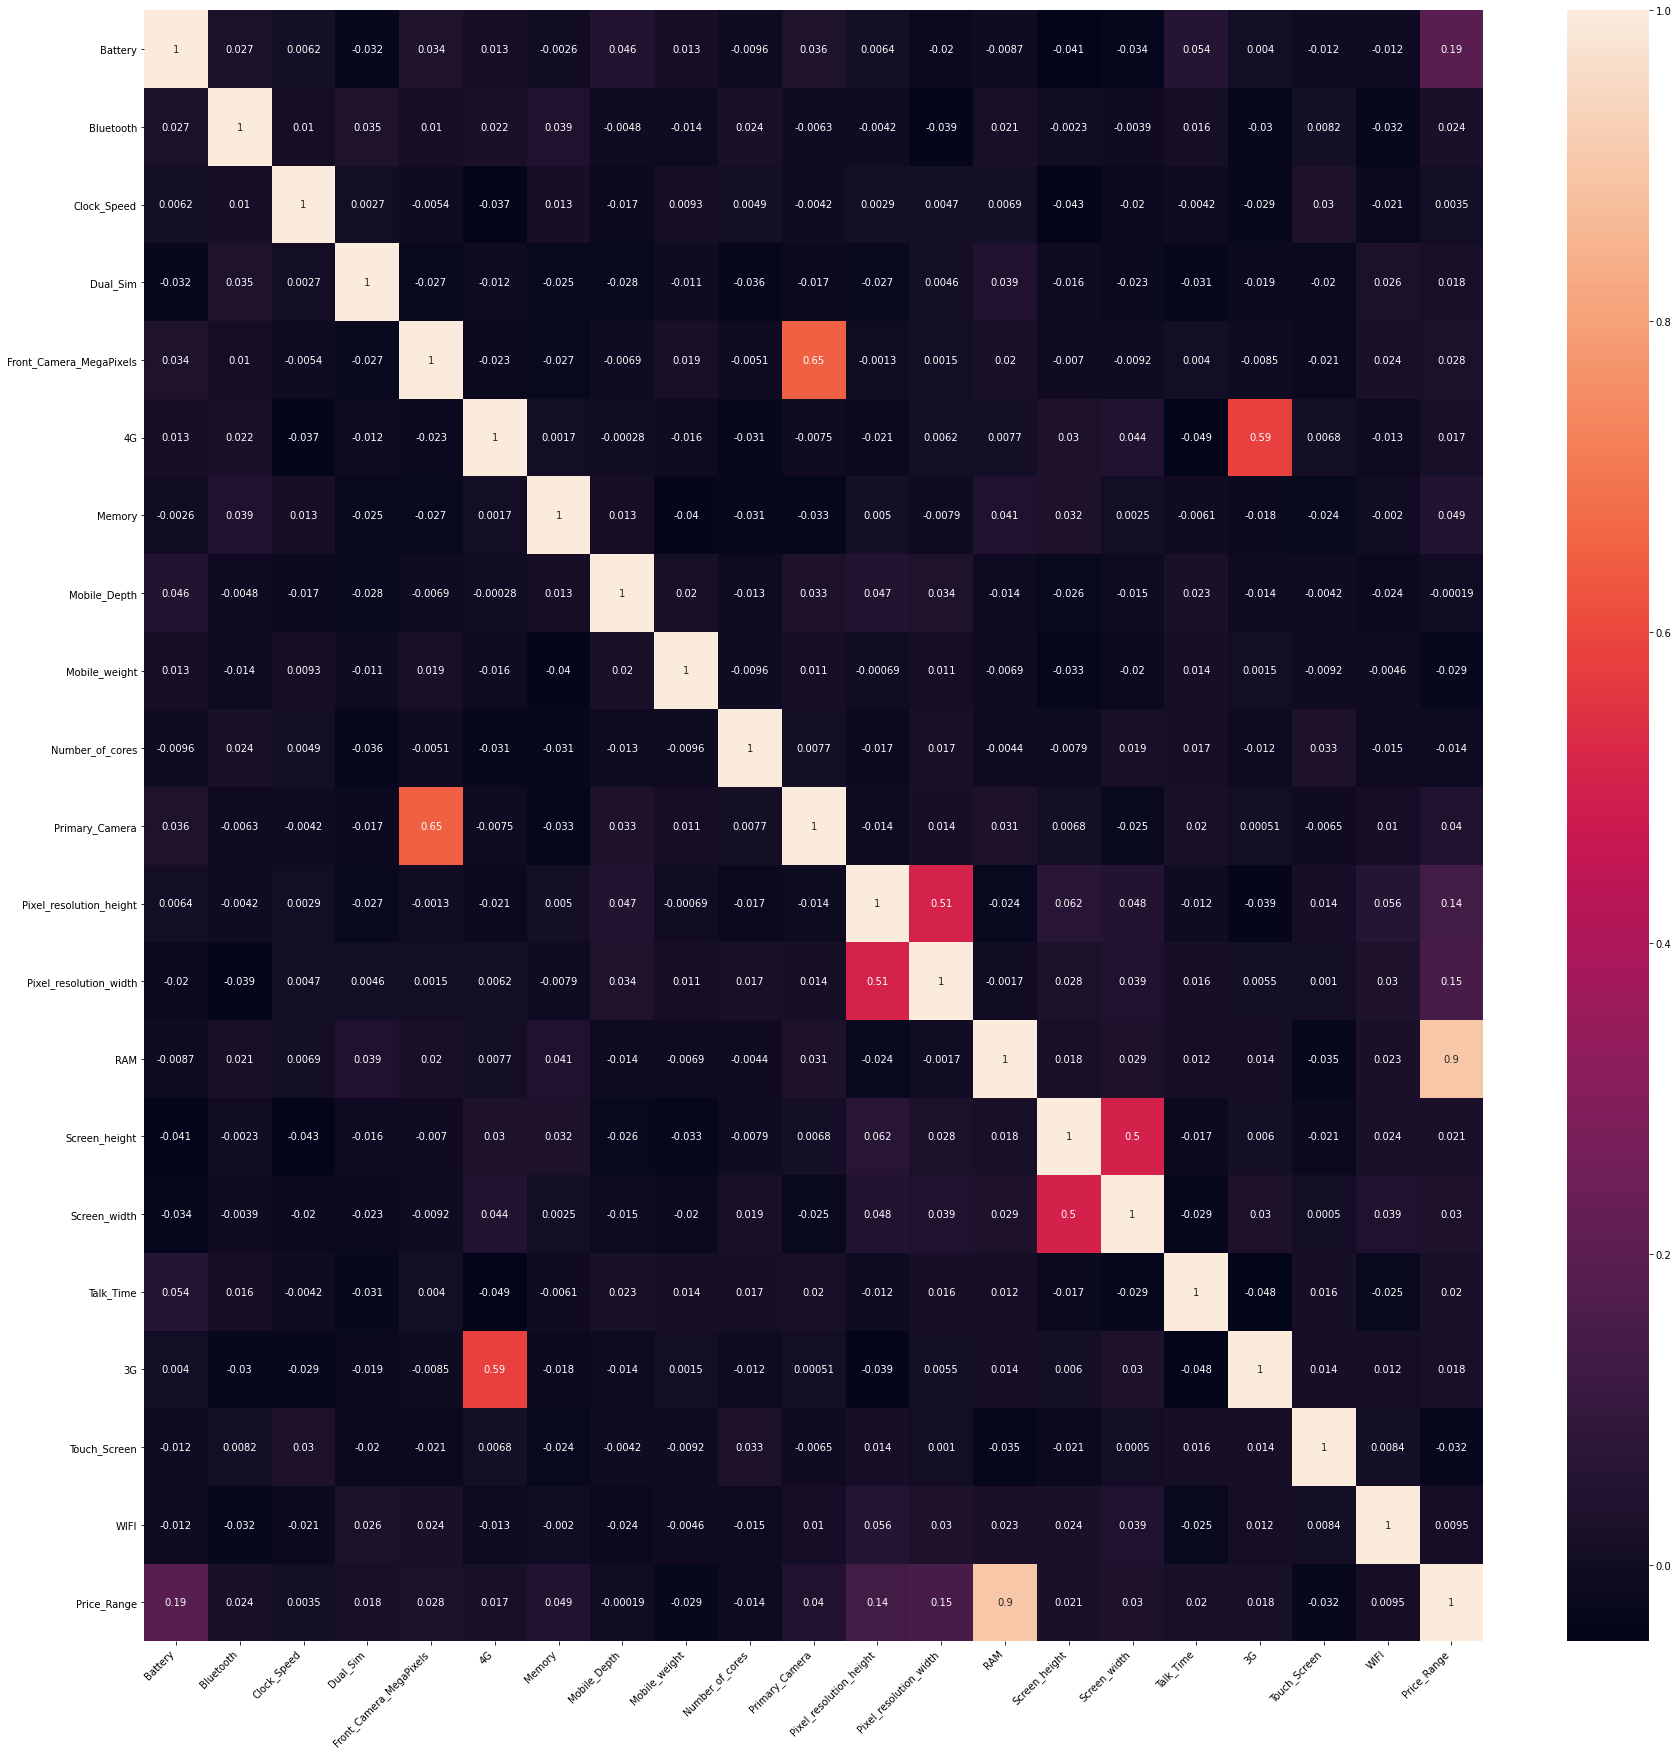

In [78]:
# Generating a heatmap : A heatmap is a two-dimensional graphical representation of data where the 
# individual values that are contained in a matrix are represented as colors.
# Reference : https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/

plt.figure(figsize = (30,30))
ax = sns.heatmap(df_corr, annot = True)
ax.set_xticklabels( ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

plt.show()

### The above heatmap shows us which columns are correlated to each other and by how much. Higher or very low correlation suggests higher dependecy between those columns.
### For example, Price range and RAM have a high correlation suggesting that as price of the RAM increases, mobile prices increases.

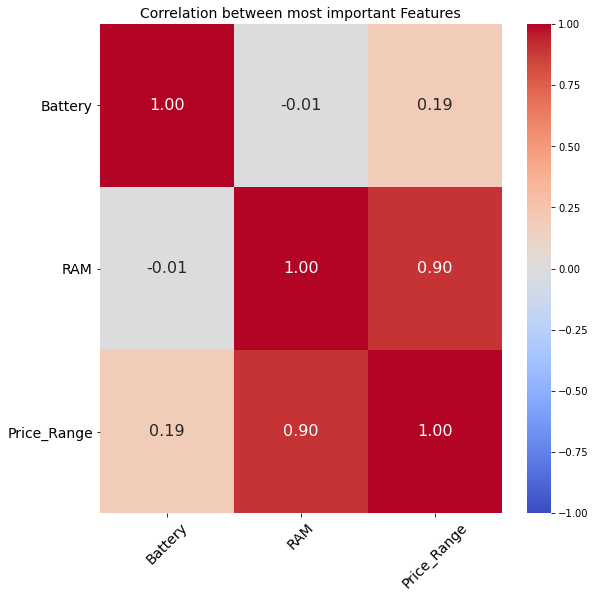

In [79]:
corr_matrix = df.corr()

threshold = 0.19
filter = np.abs(corr_matrix["Price_Range"]) > threshold
corr_features = corr_matrix.columns[filter].tolist()

f,ax=plt.subplots(figsize = (9,9))
sns.heatmap(df[corr_features].corr(), annot = True, fmt = ".2f", vmin = -1, vmax = 1, ax = ax, annot_kws = {"size": 16}, cmap = "coolwarm")
plt.xticks(rotation=45, size = 14)
plt.yticks(rotation=0, size = 14)
plt.title('Correlation between most important Features', size = 14)
plt.show()

Text(0.5, 0, 'MegaPixels')

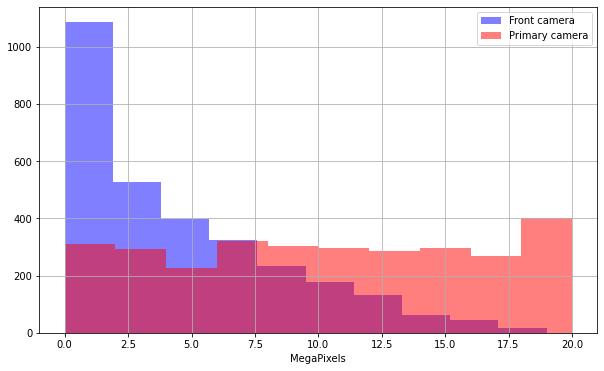

In [80]:
# Creating bar graph, X=axis (MegaPixels), y 

plt.figure(figsize=(10, 6))
df['Front_Camera_MegaPixels'].hist(alpha = 0.5, color = 'blue', label = 'Front camera')
df['Primary_Camera'].hist(alpha = 0.5, color='red', label = 'Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

### The low cost phones (price_range = 0) is skewed towards the low battery power region and the high cost phones (price_range = 3) is skewed towards the higher battery power region.

In [81]:
px.histogram(df,x = 'Battery', facet_col = 'Price_Range', nbins = 10, marginal = 'box', histnorm = 'percent')

In [82]:
# The time on singe charge is evenly distributed acorss all price ranges and this quite makes sense
# Phones that have more features will consume the battery much quickly as compared to their counterparts and hence the talk time would be similar.

px.histogram(df,x='Talk_Time',facet_col='Price_Range',nbins=10,marginal='box',histnorm='percent')

### From above there a few things worth noting,

### Many higher priced phones have more than 2M active pixels as compared to the other categories which would mean that they either have a large screen size or a better resolution.
### In the low cost category there are a few phones with less battery life and very high talktime. 
### These could be the older mobile phones with keypad.
### As intuition suggests a few the higher priced phones have it all, more pixels, large battery size, a longer talktime and of course a higher price

In [83]:
temp = df
temp['px_active'] = (temp['Pixel_resolution_height'] * temp['Pixel_resolution_width'])
px.scatter(temp, x = 'px_active', color = 'Talk_Time', y = 'Battery', facet_col = 'Price_Range', marginal_x = 'box')

In [84]:
# We were planning to drop these columns, but for now commented it out so, just incase we need later
# df.drop(['Pixel_resolution_height'], axis=1)
# df.drop(['Pixel_resolution_width'], axis=1)
# df.drop(['Mobile_Depth'], axis=1)
# df.drop(['Pixel_resolution_height','Pixel_resolution_width','Mobile_Depth'], axis=1, inplace = True)

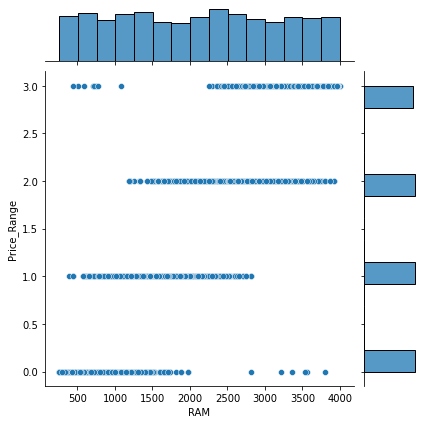

In [85]:
sns.jointplot(x='RAM',y='Price_Range',data=df);

### The above graph corresponds to the example mentioned in the heatmap.

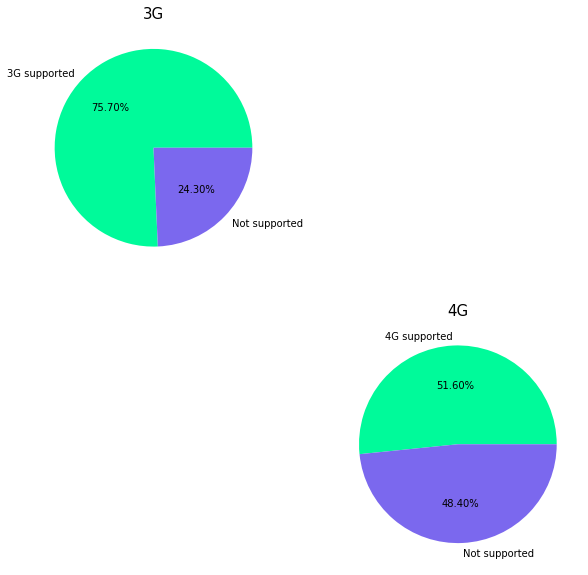

In [86]:
# Visualising the number 3G and 4G enabled devices.

_3G_values = df["3G"].value_counts()
_4G_values = df["4G"].value_counts()

labels4g = ["4G supported",'Not supported']
labels3g = ["3G supported",'Not supported']

colors = ["mediumspringgreen", "mediumslateblue"]

Pie_figure = plt.figure(figsize=(10,10))

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(x = _3G_values, autopct="%.2f%%", labels=labels3g, pctdistance=0.6, colors = colors)
plt.title('3G', size = 15)

ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(x = _4G_values,autopct="%.2f%%", labels=labels4g, pctdistance=0.6, colors = colors)
plt.title('4G', size = 15)

plt.show()

In [87]:
# Piechart showing percentage of how many devices have bluetooth and how many don't

fig = px.pie(df['Bluetooth'].value_counts().reset_index(), values = 'Bluetooth', names = ['No', 'Yes'])
fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.6, marker = dict(colors = ['#C2A77','#DE0A72'],
                line = dict(color = 'white', width = 3)))

fig.update_layout(annotations = [dict(text = 'Bluetooth', 
                                      x = 0.5, y = 0.5,
                                      font_size = 24, showarrow = False, 
                                      font_family = 'Arial',
                                      font_color = 'black')],
                  showlegend = True)
                  
fig.show()

## Feature Importance
we can get the importance of each feature by using the feature importance property. The technique gives us a score for each feature in a data, The higher the score is, more relevant feature is in predicting the output.

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

we will be using Extra Tree Classifier for extracting the top 10 features for the dataset

In [89]:
x_feat = df.drop('Price_Range', axis=1)
y_feat = df['Price_Range']
model = ExtraTreesClassifier()
model.fit(x_feat, y_feat)

ExtraTreesClassifier()

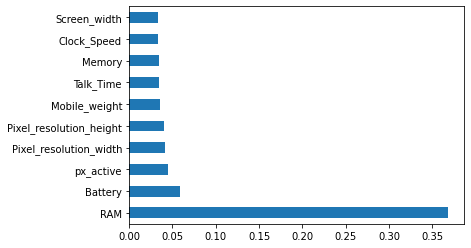

In [90]:
feat_importance = pd.Series(model.feature_importances_, index = x_feat.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()


## Classification

### We have classified using 3 different models: 
### 1. Decision Tree
### 2. Random Forest
### 3. Support vector Machine
### 4. Gradient Boosting Classifier
### 5. KNeighbors Classifier

#### We have standardised the dataset using the standard scalar library before feeding them into the model.
#### For random forest, number of estimators have been initialised to 200 looking at the size of the dataset.
#### Guassian Kernel was used ('rbf') in the support vector machine. This kernel is particulary used for non linear classification.

### We have applied the above three models on three different columns: 'Price Range', '4G' and '3G'. 

In [29]:
# Initialising the types of classifiers, columns and their respective accuracy lists.

classifiers = ['DecisionTree', 'RandomForest', 'SupportVectorMachine','GradientBoosting','LogisticRegression', 'KNeighborsClassifier']
columns = ['Price_Range', '3G', '4G']
accuracy_price_range = []
accuracy_4G = []
accuracy_3G = []

In [30]:
# Iterating over different classifiers and columns and fitting the data accordingly.

for classifier in classifiers:
    
    print ("-------------------------------------------------------------------------------------------")

    for col in columns:
        X = df.drop(col, axis = 1)
        Y = df[col]
        std = StandardScaler()
        X_standardised = std.fit_transform(X)
        df_standardised = std.fit_transform(df)
        X_train, X_test, Y_train, Y_test = train_test_split(X_standardised, Y, test_size = 0.2, random_state = 42)
        
        # Decision Tree
        
        if classifier == 'DecisionTree':
            dt = DecisionTreeClassifier()
            dt.fit(X_train,Y_train)
            Y_pred = dt.predict(X_test)
            dt_ac = accuracy_score(Y_test,Y_pred)
            if col == 'Price_Range':
                accuracy_price_range.append(dt_ac)
                conf_matrix_dt = confusion_matrix(Y_test,Y_pred)
            if col == '4G':
                accuracy_4G.append(dt_ac)
            if col == '3G':
                accuracy_3G.append(dt_ac)
            print("Accuracy using classifier " + classifier + " for column " + col + ": " + str(round(dt_ac * 100, 2)) + "%")
          
        # Random Forest
        
        if classifier == 'RandomForest':
            dt = RandomForestClassifier(n_estimators = 200)
            dt.fit(X_train,Y_train)
            Y_pred = dt.predict(X_test)
            dt_ac = accuracy_score(Y_test,Y_pred)
            if col == 'Price_Range':
                accuracy_price_range.append(dt_ac)
                conf_matrix_rf = confusion_matrix(Y_test,Y_pred)
            if col == '4G':
                accuracy_4G.append(dt_ac)
            if col == '3G':
                accuracy_3G.append(dt_ac)
            print("Accuracy using classifier " + classifier + " for column " + col + ": " + str(round(dt_ac * 100, 2)) + "%")
          
        # Support Vector Machine
        
        if classifier == 'SupportVectorMachine':
            dt = SVC(kernel='rbf', random_state = 1)
            dt.fit(X_train,Y_train)
            Y_pred = dt.predict(X_test)
            dt_ac = accuracy_score(Y_test,Y_pred)
            if col == 'Price_Range':
                accuracy_price_range.append(dt_ac)
                conf_matrix_svm = confusion_matrix(Y_test,Y_pred)
            if col == '4G':
                accuracy_4G.append(dt_ac)
            if col == '3G':
                accuracy_3G.append(dt_ac)
            print("Accuracy using classifier " + classifier + " for column " + col + ": " + str(round(dt_ac * 100, 2)) + "%")
            
        # Gradient Boosting  
        
        if classifier == 'GradientBoosting':
            dt = GradientBoostingClassifier(learning_rate = 0.1, min_samples_split = 3, min_samples_leaf = 3)
            dt.fit(X_train,Y_train)
            Y_pred = dt.predict(X_test)
            dt_ac = accuracy_score(Y_test,Y_pred)
            if col == 'Price_Range':
                accuracy_price_range.append(dt_ac)
                conf_matrix_gb = confusion_matrix(Y_test,Y_pred)
            if col == '4G':
                accuracy_4G.append(dt_ac)
            if col == '3G':
                accuracy_3G.append(dt_ac)
            print("Accuracy using classifier " + classifier + " for column " + col + ": " + str(round(dt_ac * 100, 2)) + "%")
        
        # Logistic Regression
        
        if classifier == 'LogisticRegression':
            dt = LogisticRegression()
            dt.fit(X_train,Y_train)
            Y_pred = dt.predict(X_test)
            dt_ac = accuracy_score(Y_test,Y_pred)
            if col == 'Price_Range':
                accuracy_price_range.append(dt_ac)
                conf_matrix_log = confusion_matrix(Y_test,Y_pred)
            if col == '4G':
                accuracy_4G.append(dt_ac)
            if col == '3G':
                accuracy_3G.append(dt_ac)
            print("Accuracy using classifier " + classifier + " for column " + col + ": " + str(round(dt_ac * 100, 2)) + "%")
        
        # KNeighbors Classifier
        
        if classifier == 'KNeighborsClassifier':
            dt = KNeighborsClassifier(n_neighbors = 7)
            dt.fit(X_train,Y_train)
            Y_pred = dt.predict(X_test)
            dt_ac = accuracy_score(Y_test,Y_pred)
            if col == 'Price_Range':
                accuracy_price_range.append(dt_ac)
                conf_matrix_knn = confusion_matrix(Y_test,Y_pred)
            if col == '4G':
                accuracy_4G.append(dt_ac)
            if col == '3G':
                accuracy_3G.append(dt_ac)
            print("Accuracy using classifier " + classifier + " for column " + col + ": " + str(round(dt_ac * 100, 2)) + "%")
    print ("-------------------------------------------------------------------------------------------")

    


-------------------------------------------------------------------------------------------
Accuracy using classifier DecisionTree for column Price_Range: 89.33%
Accuracy using classifier DecisionTree for column 3G: 83.67%
Accuracy using classifier DecisionTree for column 4G: 84.0%
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Accuracy using classifier RandomForest for column Price_Range: 94.67%
Accuracy using classifier RandomForest for column 3G: 85.0%
Accuracy using classifier RandomForest for column 4G: 88.67%
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
Accuracy using classifier SupportVectorMachine for column Price_Range: 93.0%
Accuracy using classifier SupportVectorMachine for column 3G: 79.83%
Accuracy usi

### Reporting and visualising the above accuracies for a better and a refined perspective.

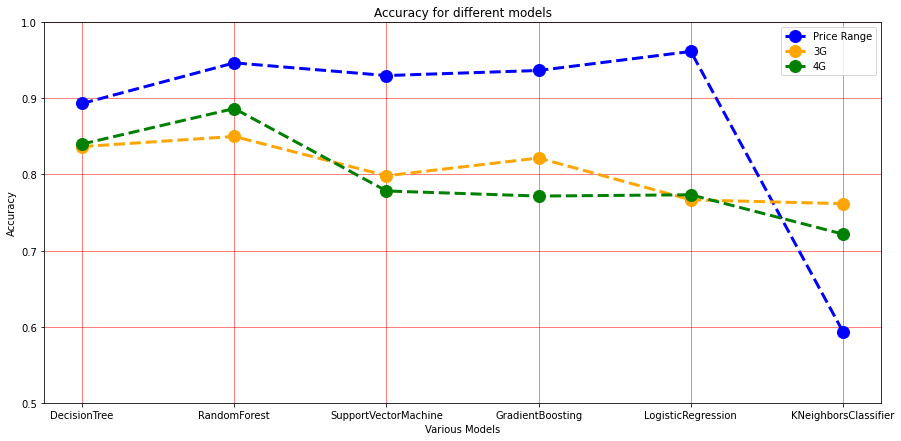

In [31]:
plt.figure(figsize=(15,7))

plt.grid(True, linewidth=0.5, color='#ff0000', linestyle='-')

plt.plot(classifiers,accuracy_price_range,color='blue', linestyle='dashed', linewidth = 3, marker='o', markersize=12)
plt.plot(classifiers,accuracy_3G, color='orange', linestyle='dashed', linewidth = 3, marker='o', markersize=12)
plt.plot(classifiers,accuracy_4G, color='green', linestyle='dashed', linewidth = 3, marker='o', markersize=12)


plt.ylim(0.5,1)
plt.title("Accuracy for different models")
plt.xlabel("Various Models")
plt.ylabel("Accuracy")
plt.legend(["Price Range", "3G", "4G"])

plt.show()

Text(0.5, 1.0, 'KNN')

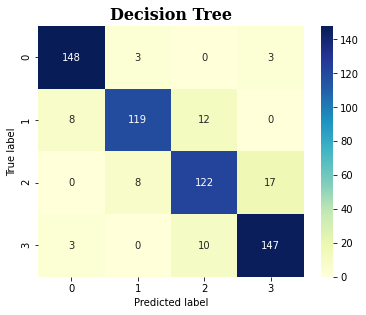

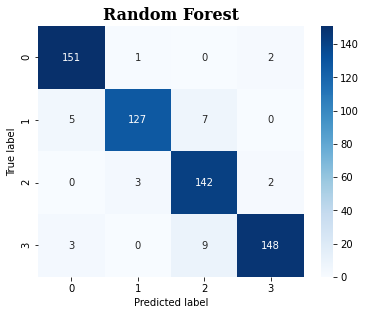

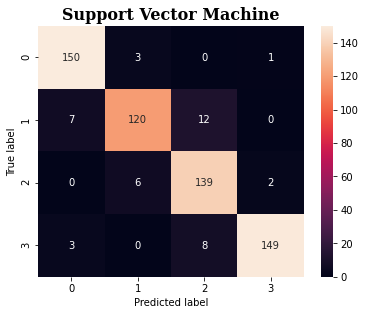

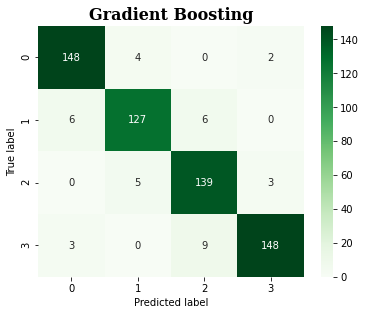

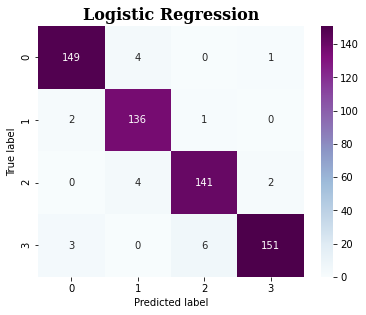

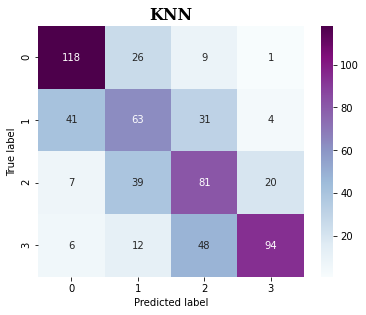

In [32]:
fig = plt.figure(figsize=(25,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_matrix_dt, annot=True,ax=ax0,fmt='d',cmap='YlGnBu')
ax0.set_xlabel('Predicted label')
ax0.set_ylabel('True label') 
ax0.set_title('Decision Tree',fontsize=16,fontfamily='serif',fontweight='bold')

fig = plt.figure(figsize=(25,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_matrix_rf, annot=True,ax=ax0,fmt='d',cmap='Blues')
ax0.set_xlabel('Predicted label')
ax0.set_ylabel('True label') 
ax0.set_title('Random Forest',fontsize=16,fontfamily='serif',fontweight='bold')

fig = plt.figure(figsize=(25,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_matrix_svm, annot=True,ax=ax0,fmt='d')
ax0.set_xlabel('Predicted label')
ax0.set_ylabel('True label') 
ax0.set_title('Support Vector Machine',fontsize=16,fontfamily='serif',fontweight='bold')

fig = plt.figure(figsize=(25,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_matrix_gb, annot=True,ax=ax0,fmt='d',cmap='Greens')
ax0.set_xlabel('Predicted label')
ax0.set_ylabel('True label') 
ax0.set_title('Gradient Boosting',fontsize=16,fontfamily='serif',fontweight='bold')

fig = plt.figure(figsize=(25,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_matrix_log, annot=True,ax=ax0,fmt='d',cmap='BuPu')
ax0.set_xlabel('Predicted label')
ax0.set_ylabel('True label') 
ax0.set_title('Logistic Regression',fontsize=16,fontfamily='serif',fontweight='bold')

fig = plt.figure(figsize=(25,12))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.6, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(conf_matrix_knn, annot=True,ax=ax0,fmt='d',cmap='BuPu')
ax0.set_xlabel('Predicted label')
ax0.set_ylabel('True label') 
ax0.set_title('KNN',fontsize=16,fontfamily='serif',fontweight='bold')

### Observations:

#### 1. On average, the Random Forest classifier, has a higher accuracy than other models
#### 2. Price Range attribute has the highest accuracy among all.
#### 3. Random Forests classifier is a good classifier.
#### 4. Logisitic Regression also gave a really high accuracy.

## Clustering

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import collections
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import OneHotEncoder

In [35]:
df = pd.read_csv('Project_Data.csv')
trainPriceRange = df["price_range"]
trainData = df.drop("price_range", axis=1)

In [36]:
#X_train,X_test,Y_train,Y_test=train_test_split(X_standardised,Y,test_size=0.2,random_state=42) 

In [37]:
embedding = MDS(n_components = 2)
trainDataTransformed = embedding.fit_transform(trainData[:500])

In [38]:
trainDataTransformed

array([[-6.28632251e+02, -7.52215884e+02],
       [ 9.05510422e+02, -1.85306208e+01],
       [ 1.07538689e+03,  1.28564614e+02],
       [ 1.13501536e+03, -3.05044737e+01],
       [ 1.37014731e+02,  1.02494940e+03],
       [ 6.60859563e+01,  1.37797128e+03],
       [ 2.55676843e+02, -1.15124279e+03],
       [-8.43108851e+02,  1.40842406e+03],
       [-9.37150571e+02,  7.65868279e+02],
       [-6.32584220e+02,  1.86313534e+03],
       [ 2.16203734e+02, -1.92948019e+03],
       [ 4.55457451e+02, -1.71293732e+03],
       [-7.42733707e+02,  4.64781120e+02],
       [ 1.37851445e+02, -5.29624583e+02],
       [-1.68856054e+03,  1.26941846e+03],
       [-2.79930105e+02,  1.84411273e+03],
       [ 1.34585310e+03, -8.52293772e+02],
       [ 6.40182135e+01, -1.78938050e+03],
       [-4.10505500e+02,  2.02987911e+02],
       [ 7.61046555e+01, -1.04334689e+02],
       [ 1.19666530e+03, -4.30067513e+01],
       [ 9.76658745e+02, -7.49051482e+02],
       [-1.01045429e+03,  3.35545311e+02],
       [-9.

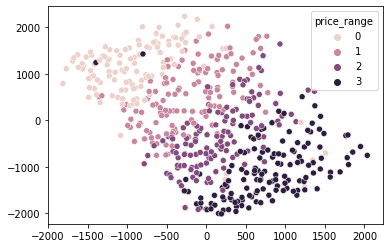

In [39]:
#plt.figure(figsize=(20,5))

ax = sns.scatterplot(x = trainDataTransformed[:, 0], y = trainDataTransformed[:, 1], hue = trainPriceRange[:500])


### Normalizing the Data

In [40]:
scaler = MinMaxScaler()
scaler.fit(trainData)
trainDataScaled = scaler.transform(trainData)

### Clustering (K-means)

In [41]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(trainDataScaled)

In [42]:
metrics.adjusted_rand_score(trainPriceRange.values, kmeans.labels_)

0.00023576424746234298

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


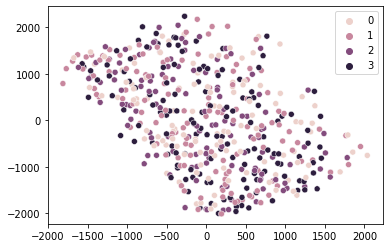

In [43]:
#plt.figure(figsize=(20,20))

ax = sns.scatterplot(x = trainDataTransformed[:, 0], y = trainDataTransformed[:, 1], hue = kmeans.labels_[:500])

### Comparing K-means labels with the ground truth, we can see K-means could not group the classes well. In fact the score indicates predicted labels are very close to random labels and it shows when plotting the multidimension scaled data with the predicted labels.

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [45]:
#Changing pandas dataframe to numpy array
df_new = pd.read_csv('Project_Data.csv')
X = df_new.iloc[:,:20].values
y = df_new.iloc[:,20:21].values


### Normalization
The next step is used to normalize the data. Normalization is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values.

In [46]:
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

Normalized data:
[-0.89748163 -0.9900495   0.83541108 -1.0168079  -0.76511182 -1.03252879
 -1.38674457  0.34584201  1.34819393 -1.10428262 -1.30244211 -1.40612461
 -1.15099087  0.40347581 -0.78133888  0.28710993  1.4580904  -1.76500038
 -1.01545271  0.98019606]


### One Hot Encoding
Next step is to one hot encode the classes. One hot encoding is a process to convert integer classes into binary values. 

In [47]:
one_hot = OneHotEncoder()
y = one_hot.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


### Splitting the data into train and test sets

In [49]:
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size = 0.2)

### ANN Model
In our neural network, we are using two hidden layers of 16 and 12 dimension.

In [50]:
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Here loss is cross entropy loss . Categorical_crossentropy specifies that we have multiple classes. The optimizer is Adam. Metrics is used to specify the way we want to judge the performance of our neural network. Here we have specified it to accuracy.

#### Training the neural network

In [52]:
history = model.fit(train_x, train_y, epochs=100, batch_size=64)

Epoch 1/100
2400/2400 [==============================] - ETA: 0s - loss: 1.4156 - accuracy: 0.27 - 4s 2ms/step - loss: 1.4153 - accuracy: 0.2713
Epoch 2/100
2400/2400 [==============================] - 0s 86us/step - loss: 1.3598 - accuracy: 0.3313
Epoch 3/100
2400/2400 [==============================] - 0s 101us/step - loss: 1.3162 - accuracy: 0.3708
Epoch 4/100
2400/2400 [==============================] - 0s 83us/step - loss: 1.2600 - accuracy: 0.4208
Epoch 5/100
2400/2400 [==============================] - 0s 83us/step - loss: 1.1791 - accuracy: 0.4917
Epoch 6/100
2400/2400 [==============================] - 0s 94us/step - loss: 1.0681 - accuracy: 0.5500
Epoch 7/100
2400/2400 [==============================] - 0s 80us/step - loss: 0.9419 - accuracy: 0.6100
Epoch 8/100
2400/2400 [==============================] - 0s 97us/step - loss: 0.8260 - accuracy: 0.6679
Epoch 9/100
2400/2400 [==============================] - 0s 78us/step - loss: 0.7320 - accuracy: 0.7233
Epoch 10/100
2400/2400

Here we need to specify the input data-> X_train, labels-> y_train, number of epochs(iterations), and batch size. It returns the history of model training. History consists of model accuracy and losses after each epoch. We will visualize it later.

Usually, the dataset is very big and we cannot fit complete data at once so we use batch size. This divides our data into batches each of size equal to batch_size. Now only this number of samples will be loaded into memory and processed. Once we are done with one batch it is flushed from memory and the next batch will be processed.



### Testing the ANN model
We check the model's performance on test data:

In [53]:
pred_y = model.predict(test_x)
#Converting predictions to label
pred = list()
for i in range(len(pred_y)):
    pred.append(np.argmax(pred_y[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(test_y)):
    test.append(np.argmax(test_y[i]))


This step is inverse one hot encoding process. We will get integer labels using this step. We can predict on test data using a simple method of keras, model.predict(). It will take the test data as input and will return the prediction outputs as softmax.

In [54]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 96.0


### Validation data:
We can use test data as validation data and can check the accuracies after every epoch. This will give us an insight into overfitting at the time of training only and we can take steps before the completion of all epochs. We can do this by changing fit function as:

In [55]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
#Re initialized to delete trained weights
# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(train_x, train_y, validation_data = (test_x, test_y), epochs=100, batch_size=64)

Train on 2400 samples, validate on 600 samples
Epoch 1/100
2400/2400 [==============================] - 2s 721us/step - loss: 1.4522 - accuracy: 0.2937 - val_loss: 1.4015 - val_accuracy: 0.3033
Epoch 2/100
2400/2400 [==============================] - 0s 141us/step - loss: 1.3614 - accuracy: 0.3371 - val_loss: 1.3481 - val_accuracy: 0.3317
Epoch 3/100
2400/2400 [==============================] - 0s 121us/step - loss: 1.3041 - accuracy: 0.3913 - val_loss: 1.2980 - val_accuracy: 0.3850
Epoch 4/100
2400/2400 [==============================] - 0s 117us/step - loss: 1.2340 - accuracy: 0.4371 - val_loss: 1.2266 - val_accuracy: 0.4483
Epoch 5/100
2400/2400 [==============================] - 0s 95us/step - loss: 1.1396 - accuracy: 0.5033 - val_loss: 1.1281 - val_accuracy: 0.5033
Epoch 6/100
2400/2400 [==============================] - 0s 87us/step - loss: 1.0287 - accuracy: 0.5608 - val_loss: 1.0192 - val_accuracy: 0.5617
Epoch 7/100
2400/2400 [==============================] - 0s 106us/step - 

### Visualizing training 

In [57]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

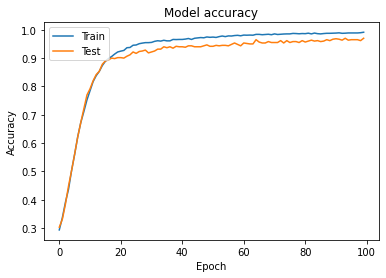

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

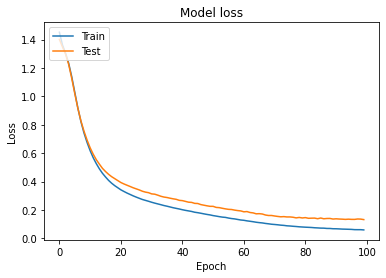

In [59]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Summary

#### Multiple approaches of classification and regression in the field of Supervised and Unsupervised Learning has been used. The following steps were performed to tackle this problem:

- Data was loaded, pre processed and cleaned, all unwanted data like missing values in the target attribute or negative classes present in a column with positive classes was removed. 

- Data visualization; correlation among features and target label (Price_Range) was computed. The most important attributes in the dataset and their dependencies were identified using Feature Importance property. It was observed that the attribute ‘RAM’ had the highest correlation with the target attribute. Another attribute called ‘Battery_Power’ had significant correlation with the target variable. Bagged Decision Tree Extra Trees was used to confirm the above observations.

- The data was split into training samples and testing samples. Split used: 80%(training) - 20%(testing).

- Multiple classification techniques were used; the accuracy of all the models was reported. The different classifiers used on this dataset were Decision Trees, Random Forests, Support Vector Machines, Gradient Boosting, Logistic Regression and KNeighbors Classifier. Analyzing different classification metrics like MSE, RMSE , Precision , Recall , Accuracy etc.

- The best model for classification was analyzed. It was observed that Random Forest classifier and Logistic Regression gave really good accuracy. Classification was performed on two more attributes: 3G and 4G. Similar trend for these columns for all classifiers was observed. Due to high dimensionality, KNN did not give a good accuracy.

- There are two hidden layers as shown in the figure which are of 16 and 12 dimensions respectively. ReLu activation function was used for the hidden layers, and Softmax activation function for the output layer since the output is a multiclass  attribute. Adam optimizer is used to shape and mold the model into its most accurate possible form by changing the weights. Our loss function is categorical cross entropy as it is used when we have multiple classes as output. Finally, we used a batch size of 64 and kept the number of epochs as 100. As we can see in the above outputs, the ANN has been trained well and gives us a good accuracy (93%) to predict the target attribute (price range). Also, the loss keeps reducing as the number of epochs increase, which is what we have expected.

- K-means labels when compared with the ground truth, we can see that K-means could not group the classes well. The adjusted Random score indicates that the predicted labels were very close to the random labels and it shows when plotting the multidimensional scaled data with the predicted labels.
